In [36]:
class Node:
  def __init__(self, column, value, data):
    self.column = column
    self.value = value
    self.data = data
    self.left = None
    self.right = None
    self.height = None

In [37]:
def gini_value(data):
  # calculate gini impurity at single set
  labels = []
  for item in data:
    labels.append(item[len(item)-1])
  
  label_set = set(labels)
  label_list = list(label_set)
  count = [0,] * len(label_list)

  for item in labels:
    for iter in range(len(label_list)):
      if item == label_list[iter]:
        count[iter] += 1
        break

  gini_val = 1
  for i in range(len(label_list)): # 1 - (p1^2 + p2^2 + ...)
    gini_val -= (count[i] / len(labels)) ** 2
  return gini_val

In [38]:
def gini_weight(data, col, val):
  # calculate the difference of child size
  group1 = [] #  < threshold
  group2 = [] #  >= threshold
  for i in range(len(data)):
    if (data[i][col] < val):
      group1.append(data[i])
    else:
      group2.append(data[i])
  return abs(len(group1) - len(group2))

In [39]:
def major(data):
  # return major label
  labels = []
  for item in data:
    labels.append(item[len(item)-1])

  label_set = set(labels)
  label_list = list(label_set)
  count = [0,] * len(label_list) # number of label appearance

  for item in labels:
    for iter in range(len(label_list)):
      if item == label_list[iter]:
        count[iter] += 1
        break

  major_index = 0
  for i in range(len(count)):
    if count[i] > count[major_index]:
      major_index = i
  return label_list[major_index]

In [40]:
def is_leaf(data):
  # check node has all same data
  labels = []
  for item in data:
    labels.append(item[len(item)-1])

  label_set = set(labels)
  
  if len(label_set) == 1:
    return True
  else:
    return False

In [42]:
def print_tree(node):
  feature = ""
  if node.column == None: # leaf node
    print((node.height) * " ", end='')
    print("[" + str(major(node.data)) + "]")
    return
  else:
    feature = "X" + str(node.column + 1)    
  print((node.height) * " ", end='')
  print("[" + feature + ", " + str(node.value) + "]")
  if node.left != None:
    print_tree(node.left)
  if node.right != None:
    print_tree(node.right)

In [56]:
# First two column is feature, last column is class label --> f1, f2, label
# Dataset 20 x 3
dataset = [[2.2343124,1.123123,0],
	[1.43523,1.54245,0],
	[3.53467889,2.234987,0],
	[3.1249876,2.09237512893,0],
	[2.1238756,9.3253154,1],
	[7.0981274,3.89074,1],
	[1.129875,3.0987234,0],
	[7.0897345,0.089745,1],
	[6.0987214,3.0978214,1],
	[6.1325,3.98763,1],
  [1.35765,2.43663,0],
	[2.345,3.3456,0],
	[0.2345,1.4356,0],
	[2.4356,5.67534,0],
	[5.234,5.23465,1],
	[4.12346,2.975,1],
	[2.5467,4.72345,0],
	[8.4612,1.6269,1],
	[5.215690,2.5362,1],
	[4.762,1.76567,1]]

# Maximum depth of tree
# Minimum number of samples to split
max_depth = 1
min_samples_split = 2
#global max_depth
#global min_samples_split

# Calculate the Gini impurity (a.k.a Gini index).
def gini_impurity(data, col, val):
  # input : dataset, column, value(threshold)
  # output : gini impurity value
  group1 = [] #  < threshold
  group2 = [] #  >= threshold
  for i in range(len(data)):
    if (data[i][col] < val):
      group1.append(data[i])
    else:
      group2.append(data[i])  

  if len(group1) == 0:
    gini1 = 0
  else:
    gini1 = gini_value(group1) # gini index of group1
  if len(group2) == 0:
    gini2 = 0
  else:
    gini2 = gini_value(group2) # gini index of group2

  return gini1 * len(group1)/len(data) + gini2 * len(group2)/len(data)

# This function will be recursively called.
# You can define your own helper functions to program this function.
# This function will be the most complicated function in this homework.
def recursive_split(node, depth):
  node.height = depth
  if (depth >= max_depth): # if tree is enough tall
    return
  if (len(node.data) < min_samples_split): # not enough data
    return
  if is_leaf(node.data) == True: # leaf node
    return

  minimum_point = [None, None, 1] # col, value, gini impurity
  for i in range(len(node.data)):
    for j in range(len(node.data[0]) - 1):
      c = gini_impurity(node.data, j, node.data[i][j]) 
      if c < minimum_point[2]:
        minimum_point = [j, node.data[i][j], c]
      elif c == minimum_point[2]:
        if gini_weight(node.data, minimum_point[0], minimum_point[1]) > gini_weight(node.data, j, node.data[i][j]):
          minimum_point = [j, node.data[i][j], c]

  # early stop
  if minimum_point[2] > gini_value(node.data):
    return    
  # update parent node and make child node  
  ldata = []
  rdata = []
  for item in node.data:
    if (item[minimum_point[0]] < minimum_point[1]):
      ldata.append(item)
    else:
      rdata.append(item)    
  if (len(ldata) == 0 or len(rdata) == 0): # Base Case
    return  
  node.column = minimum_point[0]
  node.value = minimum_point[1]
  Left = Node(None, None, ldata)
  Right = Node(None, None, rdata)
  node.left = Left
  node.right = Right
  recursive_split(node.left, depth+1)
  recursive_split(node.right, depth+1)

# This function won't be long. Prepare recursive splits and initiate them.
def my_tree(data, Max_depth, Min_samples_split):
  Root = Node(None, None, data)
  recursive_split(Root, 0)
  return Root    

tree = my_tree(dataset, max_depth, min_samples_split)
print_tree(tree)

[X1, 4.12346]
 [0]
 [1]


In [ ]:
dataset = [[2.2343124,1.123123,0],
	[1.43523,1.54245,0],
	[3.53467889,2.234987,0],
	[3.1249876,2.09237512893,0],
	[2.1238756,9.3253154,1],
	[7.0981274,3.89074,1],
	[1.129875,3.0987234,0],
	[7.0897345,0.089745,1],
	[6.0987214,3.0978214,1],
	[6.1325,3.98763,1],
  [1.35765,2.43663,0],
	[2.345,3.3456,0],
	[0.2345,1.4356,0],
	[2.4356,5.67534,0],
	[5.234,5.23465,1],
	[4.12346,2.975,1],
	[2.5467,4.72345,0],
	[8.4612,1.6269,1],
	[5.215690,2.5362,1],
	[4.762,1.76567,1]]

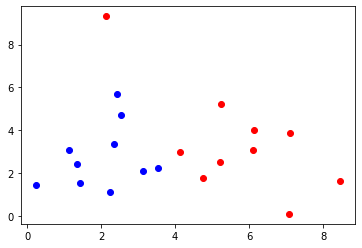

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
d = np.array(dataset)
red = d[d[:, 2] == 1]
blue = d[d[:, 2] == 0]
plt.scatter(red[:,0], red[:,1], color = 'red')
plt.scatter(blue[:,0], blue[:,1], color = 'blue')